In [3]:
import pandas as pd
import math
import numpy as np
import pandas_datareader as pdd
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
df = pdd.DataReader('TSLA', data_source='yahoo',start='2015-01-01',end='2022-01-01')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-12-31,45.136002,44.450001,44.618000,44.481998,11487500.0,44.481998
2015-01-02,44.650002,42.652000,44.574001,43.862000,23822000.0,43.862000
2015-01-05,43.299999,41.431999,42.910000,42.018002,26842500.0,42.018002
2015-01-06,42.840000,40.841999,42.012001,42.256001,31309500.0,42.256001
2015-01-07,42.956001,41.956001,42.669998,42.189999,14842000.0,42.189999
...,...,...,...,...,...,...
2021-12-27,1117.000000,1070.719971,1073.670044,1093.939941,23715300.0,1093.939941
2021-12-28,1119.000000,1078.420044,1109.489990,1088.469971,20108000.0,1088.469971
2021-12-29,1104.000000,1064.140015,1098.640015,1086.189941,18718000.0,1086.189941


In [5]:
df.shape

(1764, 6)

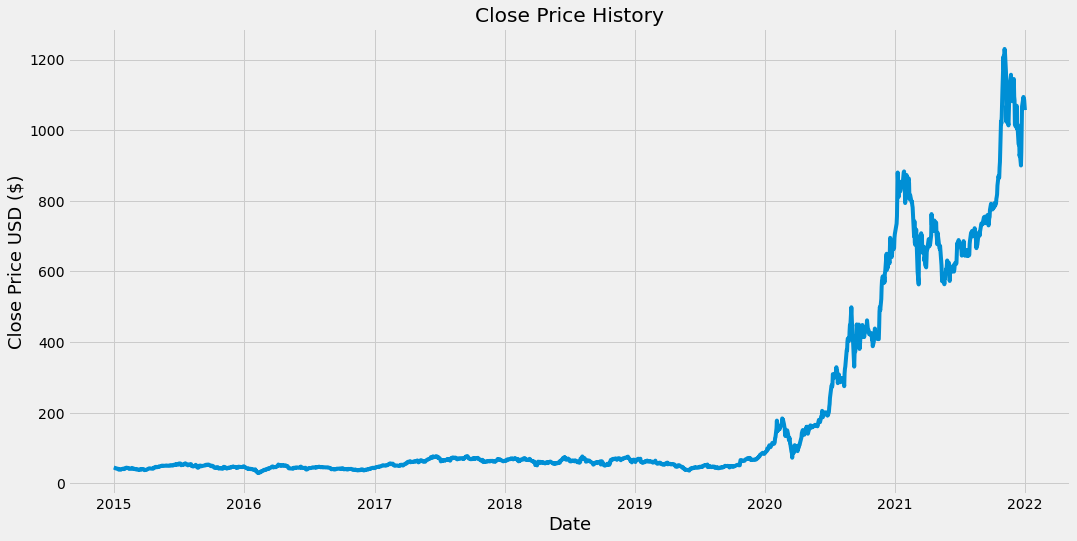

In [6]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [7]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset)*.7)

training_data_len

1235

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01311048],
       [0.01259432],
       [0.01105916],
       ...,
       [0.88035052],
       [0.86715513],
       [0.85586625]])

In [9]:
train_data = scaled_data[0:training_data_len,:]
x_train = []
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<= 61:
         print(x_train)
         print(y_train)

[array([0.01311048, 0.01259432, 0.01105916, 0.0112573 , 0.01120235,
       0.01114741, 0.01048806, 0.00974712, 0.01008678, 0.008162  ,
       0.00802547, 0.00822527, 0.00803546, 0.00880803, 0.00964888,
       0.00959393, 0.01046974, 0.01037483, 0.00927425, 0.01024496,
       0.00997856, 0.01120069, 0.01243615, 0.01246778, 0.01287405,
       0.01226964, 0.01228962, 0.01209148, 0.01151039, 0.00985867,
       0.01000686, 0.01010343, 0.01012175, 0.0113289 , 0.01222802,
       0.01060128, 0.01006347, 0.01000519, 0.0105763 , 0.00993526,
       0.00893458, 0.00930588, 0.00978541, 0.00948404, 0.00836014,
       0.00786063, 0.00776739, 0.00833683, 0.00789227, 0.00749432,
       0.00866318, 0.00850167, 0.00949736, 0.00865485, 0.00905946,
       0.00931753, 0.00966553, 0.00843007, 0.00778237, 0.00688159])]
[0.007809012907366058]
[array([0.01311048, 0.01259432, 0.01105916, 0.0112573 , 0.01120235,
       0.01114741, 0.01048806, 0.00974712, 0.01008678, 0.008162  ,
       0.00802547, 0.00822527, 0.00

In [10]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [11]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1175, 60, 1)

In [12]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [13]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [14]:
model.fit(x_train,y_train,batch_size=1,epochs=10)

Epoch 1/10
1175/1175 [==============================] - 17s 13ms/step - loss: 2.7083e-05
Epoch 2/10
1175/1175 [==============================] - ETA: 0s - loss: 1.0873e-0 - 16s 13ms/step - loss: 1.0882e-05
Epoch 3/10
1175/1175 [==============================] - 16s 13ms/step - loss: 7.8275e-06
Epoch 4/10
1175/1175 [==============================] - 17s 15ms/step - loss: 5.9895e-06
Epoch 5/10
1175/1175 [==============================] - 17s 15ms/step - loss: 5.5128e-06
Epoch 6/10
1175/1175 [==============================] - 17s 15ms/step - loss: 5.0550e-06
Epoch 7/10
1175/1175 [==============================] - 19s 16ms/step - loss: 4.6749e-06
Epoch 8/10
1175/1175 [==============================] - 17s 15ms/step - loss: 4.6563e-06
Epoch 9/10
1175/1175 [==============================] - 17s 15ms/step - loss: 4.6151e-06
Epoch 10/10
1175/1175 [==============================] - 17s 14ms/step - loss: 4.3817e-06


In [15]:
test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])
    

In [16]:
x_test = np.array(x_test)

In [17]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [18]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [19]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

63.779748559674154

C:\Users\CARELA~1\AppData\Local\Temp/ipykernel_3988/1428127557.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


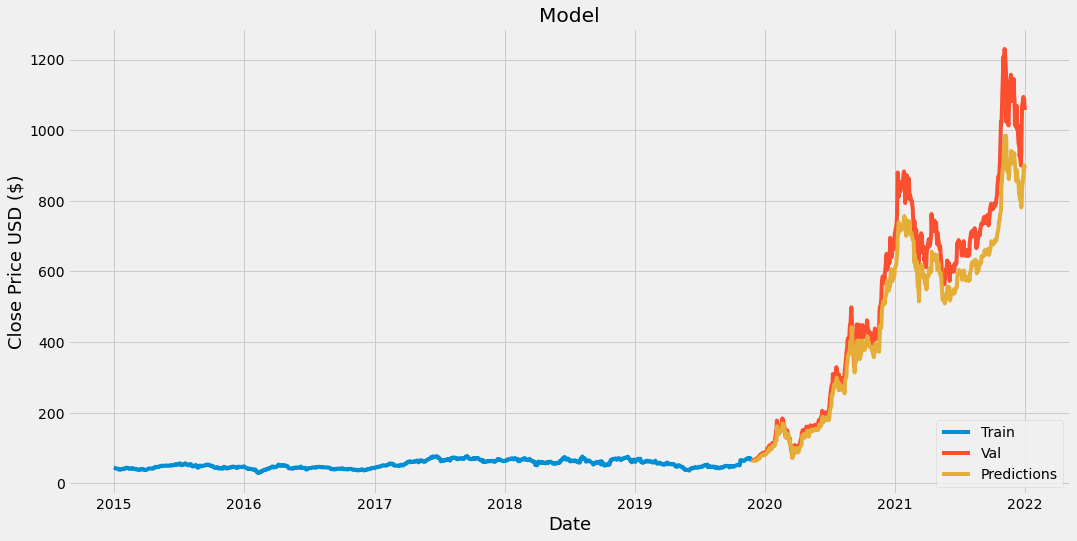

In [20]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [21]:
valid

,Close,Predictions
Date,,
2019-11-26,65.783997,65.130089
2019-11-27,66.258003,63.765575
2019-11-29,65.987999,64.205414
2019-12-02,66.973999,63.888271
2019-12-03,67.239998,64.692505
...,...,...
2021-12-27,1093.939941,873.835999
2021-12-28,1088.469971,896.730530
2021-12-29,1086.189941,900.079773


In [24]:
valid.to_csv("valid.csv", index=False)